In [96]:
%reload_kedro

[10/17/22 12:15:49] INFO     No path argument was provided. Using: C:\work\weather_us\weather-us     ]8;id=663552;file://C:\work\weather_us\venv\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=127672;file://C:\work\weather_us\venv\lib\site-packages\kedro\ipython\__init__.py#56\56]8;;\

[10/17/22 12:15:50] INFO     Kedro project weather_us                                                ]8;id=845936;file://C:\work\weather_us\venv\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=208657;file://C:\work\weather_us\venv\lib\site-packages\kedro\ipython\__init__.py#77\77]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and 'pipelines' ]8;id=849262;file://C:\work\weather_us\venv\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=500820;file://C:\work\weather_us\venv\lib\site-packages\kedro\ipython\__init__.py#78\78]8;;\

In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

In [97]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn import preprocessing
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings

warnings.filterwarnings('ignore')

In [98]:
catalog.list()

['weather_aus_raw', 'parameters']

In [99]:
df = catalog.load("weather_aus_raw")

[10/17/22 12:15:59] INFO     Loading data from 'weather_aus_raw' (CSVDataSet)...                ]8;id=776807;file://C:\work\weather_us\venv\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=545627;file://C:\work\weather_us\venv\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

In [100]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [101]:
df.shape


(145460, 23)

# Extracting Training data/ labeled data

In [102]:
# We need to create a node
def extract_training_data(df):
    """" Extracting the training data from raw data and droping Date column
    Args: Pandas DataFrame here Raw Data
    Return: DataFrame i.e. Training Data"""
    df = df.drop("Date", axis = 1)
    df1 = df[df['RainTomorrow'].notna()]   #This is our training data
    return df1

In [103]:
df1 = extract_training_data(df)

In [104]:
df1.shape

(142193, 22)

In [105]:
# Model pickling ---pickle  ---dump

# Model unpickling ---load the model in notebook

# Inference: we need predictions on null values(Target variables)

# Lablel Encoding & Filling the null values

In [106]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [107]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [108]:
# We need to create a node
def label_encoding_filling_null(df1):
    """" label encoding the training  and filling null values in column
    Args:  DataFrame training data
    Return: DataFrame without null values i.e. Training Data"""
    #replacing null values in categorical variables with mode value
    df1['WindGustDir'].fillna(df1['WindGustDir'].mode()[0], inplace=True)
    df1['WindDir9am'].fillna(df1['WindDir9am'].mode()[0], inplace=True)
    df1['WindDir3pm'].fillna(df1['WindDir3pm'].mode()[0], inplace=True)
    df1['RainToday'].fillna(df1['RainToday'].mode()[0], inplace=True)
    df1['RainTomorrow'].fillna(df1['RainTomorrow'].mode()[0], inplace=True)

        # label_encoder object knows how to understand word labels.
    label_encoder = preprocessing.LabelEncoder()
    
    # Encode labels in column 'Location'.'RainTomorrow','Date','WindDir9am',	'WindDir3pm',	'RainToday',	'RainTomorrow'
    df1['Location']= label_encoder.fit_transform(df1['Location'])
    df1['WindGustDir']= label_encoder.fit_transform(df1['WindGustDir'])
    df1['WindDir9am']= label_encoder.fit_transform(df1['WindDir9am'])
    df1['WindDir3pm']= label_encoder.fit_transform(df1['WindDir3pm'])
    df1['RainToday']= label_encoder.fit_transform(df1['RainToday'])
    df1['RainTomorrow']= label_encoder.fit_transform(df1['RainTomorrow'])
    
    #filling the null values in numerical variable with median
    df1 = df1.fillna(df1.median())


    return df1

In [109]:
df1= label_encoding_filling_null(df1)
df1

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,4.8,8.5,13,44.0,13,14,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,2,7.4,25.1,0.0,4.8,8.5,14,44.0,6,15,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,2,12.9,25.7,0.0,4.8,8.5,15,46.0,13,15,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,2,9.2,28.0,0.0,4.8,8.5,4,24.0,9,0,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,2,17.5,32.3,1.0,4.8,8.5,13,41.0,1,7,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,41,3.5,21.8,0.0,4.8,8.5,0,31.0,2,0,...,59.0,27.0,1024.7,1021.2,5.0,5.0,9.4,20.9,0,0
145455,41,2.8,23.4,0.0,4.8,8.5,0,31.0,9,1,...,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,0,0
145456,41,3.6,25.3,0.0,4.8,8.5,6,22.0,9,3,...,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,0,0
145457,41,5.4,26.9,0.0,4.8,8.5,3,37.0,9,14,...,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,0,0


# Spliting data into training and testing

In [110]:
# We need to create a node
def  split_data(df1):

    """Splits data into features and targets training and test sets.
    Args:
        data: Data containing features and target.
    Returns:
        Split data.
    """
    X = df1.drop(['RainTomorrow'], axis=1)

    y = df1['RainTomorrow']
    
                # split X and y into training and testing sets
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    
    return X_train, X_test, y_train, y_test


In [111]:
 X_train, X_test, y_train, y_test= split_data(df1)


In [112]:
# check the shape of X_train and X_test
print(X_train.shape, X_test.shape)

(113754, 21) (28439, 21)


# Training model

In [113]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

In [114]:
def train_model(X_train: pd.DataFrame, y_train: pd.Series) -> LogisticRegression:
    """Trains the logistic regression model.
    Args:
        X_train: Training data of independent features.
        y_train: Training data for price.
    Returns:
        Trained model.
    """
    # instantiate the model
    logreg = LogisticRegression(solver='liblinear', random_state=0)

   # fit the model
    logreg.fit(X_train, y_train)
    return logreg

In [115]:
 logreg= train_model(X_train, y_train)

# Model evaluation

In [ ]:
def evaluate_model(
    logreg: LogisticRegression, X_test: pd.DataFrame, y_test: pd.Series
):
    """Calculates and logs the coefficient of determination.
    Args:
        logreg: Trained model.
        X_test: Testing data of independent features.
        y_test: Testing data for price.
        
    Returns:
        y_pred_test:prediction on x test
        acc        :accuracy_score
    """
    y_pred_test = logreg.predict(X_test)
    #**Check accuracy score**
    from sklearn.metrics import accuracy_score
    acc=(accuracy_score(y_test, y_pred_test))
    print('Model accuracy score: ', acc)
    return(y_pred_test,acc)

In [ ]:
y_pred_test,acc_lrg=evaluate_model(logreg, X_test, y_test)

Model accuracy score:  0.8429972924505081


# Confusion matrix and Classification report

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
#import classification regression
from sklearn.metrics import classification_report

In [ ]:
def final_report(y_test: pd.Series, y_pred_test: pd.Series):
    """Calculates and logs the coefficient of determination.
    Args:
        y_test_pred: prediction on training model
        y_test: Testing data for price.
    """
    cm = confusion_matrix(y_test, y_pred_test)
    # visualize confusion matrix with seaborn heatmap

    cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                     index=['Predict Positive:1', 'Predict Negative:0'])

    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
    
    print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22067
           1       0.72      0.49      0.58      6372

    accuracy                           0.84     28439
   macro avg       0.79      0.72      0.74     28439
weighted avg       0.83      0.84      0.83     28439



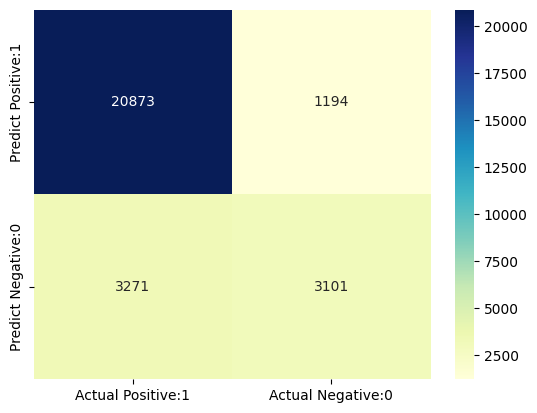

In [ ]:
final_report(y_test,y_pred_test)

# Other model testing

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# SVC model training

In [ ]:
def train_model(X_train: pd.DataFrame, y_train: pd.Series) -> SVC:
    """Trains the SVC model.
    Args:
        X_train: Training data of independent features.
        y_train: Training data for price.
    Returns:
        Trained model.
    """
    # instantiate the model
    svc = SVC()

   # fit the model
    svc.fit(X_train, y_train)
    return svc

In [ ]:
 svc= train_model(X_train, y_train)

# SVC Model Evaluation

In [ ]:
def evaluate_model(
    svc: SVC(), X_test: pd.DataFrame, y_test: pd.Series
):
    """Calculates and logs the coefficient of determination.
    Args:
        svc: Trained model.
        X_test: Testing data of independent features.
        y_test: Testing data for price.
        
    Returns:
        y_pred_test:prediction on x test
        acc        :accuracy_score
    """
    y_pred_test = svc.predict(X_test)
    #**Check accuracy score**
    from sklearn.metrics import accuracy_score
    acc=(accuracy_score(y_test, y_pred_test))
    print('Model accuracy score: ', acc)
    return(y_pred_test,acc)

In [ ]:
y_pred_test,acc_svc=evaluate_model(svc, X_test, y_test)

Model accuracy score:  0.8379689862512747


# RandomForestClassifier model training

In [ ]:
def train_model_rf(X_train: pd.DataFrame, y_train: pd.Series) :
    """Trains the RandomForestClassifier.
    Args:
        X_train: Training data of independent features.
        y_train: Training data for price.
    Returns:
        Trained model.
    """
    # instantiate the model
    random_forest = RandomForestClassifier(n_estimators=100)

   # fit the model
    random_forest.fit(X_train, y_train)
    return random_forest

In [ ]:
random_forest = train_model_rf(X_train, y_train)

# RandomForestClassifier Model Evaluation

In [ ]:
def evaluate_model_rf(
     random_forest :RandomForestClassifier(),X_test: pd.DataFrame, y_test: pd.Series
):
    """Calculates and logs the coefficient of determination.
    Args:
        random_forest: Trained model.
        X_test: Testing data of independent features.
        y_test: Testing data for price.
        
    Returns:
        y_pred_test:prediction on x test
        acc        :accuracy_score
    """
    y_pred_test =  random_forest.predict(X_test)
    #**Check accuracy score**
    from sklearn.metrics import accuracy_score
    acc=(accuracy_score(y_test, y_pred_test))
    print('Model accuracy score: ', acc)
    return(y_pred_test,acc)

In [ ]:
y_pred_test,acc_rfc=evaluate_model_rf(random_forest, X_test, y_test)

Model accuracy score:  0.8587854706564928


# DecisionTreeClassifier model training

In [ ]:
def train_model_dt(X_train: pd.DataFrame, y_train: pd.Series)  :
    """Trains the DecisionTreeClassifier model.
    Args:
        X_train: Training data of independent features.
        y_train: Training data for price.
    Returns:
        Trained model.
    """
    # instantiate the model
    decision_tree = DecisionTreeClassifier()

   # fit the model
    decision_tree.fit(X_train, y_train)
    return  decision_tree

In [ ]:
 decision_tree = train_model_dt(X_train, y_train)

# DecisionTreeClassifier Model Evaluation

In [ ]:
from sklearn.base import accuracy_score


def evaluate_model_dt(
     decision_tree : DecisionTreeClassifier(),X_test: pd.DataFrame, y_test: pd.Series
):
    """Calculates and logs the coefficient of determination.
    Args:
        decision_tree: Trained model.
        X_test: Testing data of independent features.
        y_test: Testing data for price.
        
    Returns:
        y_pred_test:prediction on x test
        acc        :accuracy_score
    """
    y_pred_test =   decision_tree.predict(X_test)
    #**Check accuracy score**
    acc=(accuracy_score(y_test, y_pred_test))
    print('Model accuracy score: ', acc)
    return(y_pred_test,acc)

In [ ]:
y_pred_test,acc_dtc=evaluate_model_dt(decision_tree, X_test, y_test)

Model accuracy score:  0.7882836949259819


# KNeighborsClassifier model training

In [ ]:
def train_model_knn(X_train: pd.DataFrame, y_train: pd.Series)  :
    """Trains the KNeighborsClassifier Model.
    Args:
        X_train: Training data of independent features.
        y_train: Training data for price.
    Returns:
        Trained model.
    """
    # instantiate the model
    knn = KNeighborsClassifier(n_neighbors = 3)

   # fit the model
    knn.fit(X_train, y_train)
    return  knn

In [ ]:
 knn = train_model_knn(X_train, y_train)

# KNeighborsClassifier Model Evaluation

In [ ]:
def evaluate_model(
      knn : KNeighborsClassifier(),X_test: pd.DataFrame, y_test: pd.Series
):
    """Calculates and logs the coefficient of determination.
    Args:
        knn: Trained model.
        X_test: Testing data of independent features.
        y_test: Testing data for price.
        
    Returns:
        y_pred_test:prediction on x test
        acc        :accuracy_score
    """
    y_pred_test =   knn.predict(X_test)
    #**Check accuracy score**
    from sklearn.metrics import accuracy_score
    acc=(accuracy_score(y_test, y_pred_test))
    print('Model accuracy score: ', acc)
    return(y_pred_test,acc)

In [ ]:
y_pred_test,acc_knn=evaluate_model(knn, X_test, y_test)

Model accuracy score:  0.8313583459334013


# Final report

In [ ]:
models = pd.DataFrame({
    'Model': ['LogisticRegression','SVC', 'KNN', 
              'Random Forest', 'Decision Tree',],
    'Score': [acc_lrg,acc_svc,acc_rfc,acc_dtc,acc_knn]})
models

,Model,Score
0,LogisticRegression,0.842997
1,SVC,0.837969
2,KNN,0.858785
3,Random Forest,0.788284
4,Decision Tree,0.801959


# Pickiling and Unpickling of the model

In [ ]:
#Use pickle to save our model so that we can use it later

import pickle 
# Saving model to disk
pickle.dump(knn, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

In [ ]:
infile = open('model.pkl','rb')
model1 = pickle.load(infile)
infile.close()

In [ ]:
knn

KNeighborsClassifier(n_neighbors=3)

In [ ]:
model

KNeighborsClassifier(n_neighbors=3)

In [ ]:
model1

KNeighborsClassifier(n_neighbors=3)

# Inference: we need predictions on null values(Target variables)

## Now Creating new dataset DF2 & extracting data

In [ ]:
# We need to create a node
def extract_training_data_inference(df):
    """" Extracting the training data from raw data and droping Date column
    Args: Pandas DataFrame here Raw Data
    Return: DataFrame i.e. Training Data"""
    
     #This is our training data
    df3=df[df['RainTomorrow'].isna()]
    df3 = df3.drop("Date", axis = 1)
    return df3

In [ ]:
new_var = df3 = extract_training_data(df)
new_var

In [ ]:

df3

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
14,Albury,8.4,24.6,0.0,NaN,NaN,NaN,NaN,S,WNW,...,57.0,32.0,1009.7,1008.7,NaN,NaN,15.9,23.5,No,NaN
283,Albury,2.6,NaN,0.0,NaN,NaN,NaN,NaN,E,WNW,...,71.0,55.0,1017.8,1017.6,NaN,6.0,9.7,14.3,No,NaN
435,Albury,22.1,35.1,0.0,NaN,NaN,NaN,NaN,ENE,SW,...,58.0,37.0,1020.9,1017.8,NaN,1.0,26.9,33.5,No,NaN
437,Albury,21.5,35.0,0.0,NaN,NaN,NaN,NaN,SSE,E,...,76.0,35.0,1015.8,1010.3,NaN,8.0,24.2,33.1,No,NaN
443,Albury,15.5,30.6,0.0,NaN,NaN,NaN,NaN,SE,SSW,...,66.0,30.0,1015.9,1013.8,NaN,NaN,19.4,30.0,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144955,Uluru,22.5,37.7,0.0,NaN,NaN,SE,50.0,SE,ESE,...,22.0,11.0,1012.6,1009.6,NaN,NaN,28.8,37.2,No,NaN
145091,Uluru,12.3,19.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,79.0,62.0,1016.8,1014.1,8.0,8.0,15.6,18.9,No,NaN
145092,Uluru,14.2,18.7,NaN,NaN,NaN,NaN,NaN,W,NaN,...,81.0,67.0,1015.2,1014.6,8.0,8.0,16.6,17.5,NaN,NaN
145335,Uluru,13.5,NaN,0.0,NaN,NaN,NaN,NaN,ENE,SW,...,23.0,11.0,1013.7,1008.4,NaN,NaN,25.2,34.4,No,NaN


## Label encoding

In [ ]:
# We need to create a node
def label_encoding_filling_null_inference(df3):
    """" label encoding the training  and filling null values in column
    Args:  DataFrame training data
    Return: DataFrame without null values i.e. Training Data"""
    
    # label_encoder object knows how to understand word labels.
    label_encoder = preprocessing.LabelEncoder()
  
    # Encode labels in column 'Location'.'RainTomorrow','Date','WindDir9am',	'WindDir3pm',	'RainToday',	'RainTomorrow'
    df3['Location']= label_encoder.fit_transform(df3['Location'])
    df3['WindGustDir']= label_encoder.fit_transform(df3['WindGustDir'])
    df3['WindDir9am']= label_encoder.fit_transform(df3['WindDir9am'])
    df3['WindDir3pm']= label_encoder.fit_transform(df3['WindDir3pm'])
    df3['RainToday']= label_encoder.fit_transform(df3['RainToday'])
    df3['RainTomorrow']= label_encoder.fit_transform(df3['RainTomorrow'])
    return (df3)

In [ ]:
df2=label_encoding_filling_null(df3)

# splitting data

In [ ]:
# We need to create a node
def  split_data_infernce(df):

    """Splits data into features and targets training and test sets.
    Args:
        data: Data containing features and target.
    Returns:
        Split data.
    """
    X = df3.drop(['RainTomorrow'], axis=1)

    y = df3['RainTomorrow']
    
    #now categorial variables
    #replacing null values in categorical variables with mode value
    X['WindGustDir'].fillna(X['WindGustDir'].mode()[0], inplace=True)
    X['WindDir9am'].fillna(X['WindDir9am'].mode()[0], inplace=True)
    X['WindDir3pm'].fillna(X['WindDir3pm'].mode()[0], inplace=True)
    X['RainToday'].fillna(X['RainToday'].mode()[0], inplace=True)
    
        #filling the null values in numerical variable with median
    X = X.fillna(X.median())
    return X , y


In [ ]:
 X,y= split_data(df3)

In [ ]:
print(X.shape)
print(y.shape)

(3267, 21)
(3267,)


In [ ]:
print(y.isna().sum())
X.isna().sum()

0


Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

# Now predict results on past traning model building

In [ ]:
def evaluate_model_infernce(
      knn : KNeighborsClassifier(),X: pd.DataFrame, y: pd.Series
):
    """Calculates and logs the coefficient of determination.
    Args:
        knn: Trained model.
        X:  data of independent features.
        y:  data for price.
        
    Returns:
        y_pred_test:prediction on x test
        acc        :accuracy_score
    """
    y_pred_2 =   knn.predict(X)
    #**Check accuracy score**
    from sklearn.metrics import accuracy_score
    acc=(accuracy_score(y, y_pred_2))
    print('Model accuracy score: ', acc)
    print(classification_report(y, y_pred_2))
    return(y_pred_2,acc)

In [ ]:
y_pred_2,acc_knn=evaluate_model(knn, X, y)

Model accuracy score:  0.8019589837771656
              precision    recall  f1-score   support

           0       1.00      0.80      0.89      3267
           1       0.00      0.00      0.00         0

    accuracy                           0.80      3267
   macro avg       0.50      0.40      0.45      3267
weighted avg       1.00      0.80      0.89      3267

